# <span style="color:blue">MBA em Ciência de Dados</span>
# <span style="color:blue">Análise de Dados com Base em Processamento Massivo em Paralelo</span>

## <span style="color:blue">Aula 05: Consultas OLAP</span>
## <span style="color:blue">Exemplo usando Pandas</span>

**Material Produzido por:**<br>
>**Profa. Dra. Cristina Dutra de Aguiar Ciferri**<br>
>**André Marcos Perez**<br>
>**Guilherme Muzzi da Rocha**<br> 
>**Jadson José Monteiro Oliveira**<br> 
>**Leonardo Mauro Pereira Moraes**<br> 

**CEMEAI - ICMC/USP São Carlos**

# 1 Introdução

A aplicação de *data warehousing* da BI Solutions utiliza como base uma contelação de fatos que une dois esquemas estrela, conforme descrito a seguir.


## 1.1 Esquema Estrela Pagamento

O primeiro esquema estrela, chamado Pagamento, é composto pelas seguintes tabelas de dimensão e tabela de fatos:

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)

## 1.2 Esquema Estrela Negociação

O segundo esquema estrela, chamado Negociacao, é composto pelas seguintes tabelas de dimensão e tabela de fatos:
- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.3 Constelação de Fatos

Na constelação de fatos, as tabelas de dimensão data e equipe são tabelas em comum entre os dois esquemas estrela. As tabelas de dimensão e as tabelas de fatos da constelação da BI Solutions são listadas a seguir.

**Tabelas de dimensão**

- data (dataPK, dataCompleta, dataDia, dataMes, dataBimestre, dataTrimestre, dataSemestre, dataAno)
- funcionario (funcPK, funcMatricula, funcNome, funcSexo, funcDataNascimento, funcDiaNascimento, funcMesNascimento, funcAnoNascimento, funcCidade, funcEstadoNome, funcEstadoSigla, funcRegiaoNome, funcRegiaoSigla, funcPaisNome, funcPaisSigla)
- equipe (equipePK, equipeNome, filialNome, filialCidade, filialEstadoNome, filialEstadoSigla, filialRegiaoNome, filialRegiaoSigla, filialPaisNome, filialPaisSigla)
- cargo (cargoPK, cargoNome, cargoRegimeTrabalho, cargoEscolaridadeMinima, cargoNivel)
- cliente (clientePK, clienteNomeFantasia, clienteSetor, clienteCidade, clienteEstadoNome, clienteEstadoSigla, clienteRegiaoNome, clienteRegiaoSigla, clientePaisNome, clientePaisSigla)

**Tabelas de fatos**
- pagamento (dataPK, funcPK, equipePK, cargoPK, salario, quantidadeLancamento)
- negociacao (dataPK, equipePK, clientePK, receita, quantidadeNegociacao)

## 1.4 Junção Estrela

A operação de junção estrela é necessária devido à forma de organização dos dados do data warehouse segundo os tipos de esquema estrela, floco de neve e estrela-foco. 

No processamento de uma consulta OLAP especificada pelo usuário de sistemas de suporte à decisão, deve-se realizar as seguintes atividades:
- Acessar a tabela de fatos e todas as tabelas de dimensão envolvidas na consulta.
- Realizar as junções necessárias, usando como base a integridade referencial, ou seja, usando como base os pares de chave primária (PK) e chave estrangeira (FK). No caso da junção estrela, isso significa fazer a junção da chave primária de cada tabela de dimensão envolvida na consulta com a chave estrangeira daquela tabela presente na tabela de fatos.
- Exibir os resultados obtidos.

Em Pandas, a junção estrela é feita usando-se o comando `merge`. Dentro do contexto desta aula, comando `merge` realiza a junção entre dois `DataFrames`, considerando a(s) coluna(s) usada como base para a junção, chamada de coluna(s) de junção.  Maiores detalhes sobre o comando merge podem ser obtidos neste [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).


# 2 Carregamento das Tabelas de Dimensão e das Tabelas de Fatos



In [1]:
import pandas as pd

Os comandos a seguir instanciam os `DataFrames` que são usados nas consultas analíticas. Para facilitar o entendimento dos conceitos, cada `DataFrame` possui o mesmo nome da tabela de dimensão ou da tabela de fatos correspondente.  

### 2.1 Carregamento das Tabelas de Dimensão

In [2]:
# criando e exibindo o DataFrame para a tabela de dimensão data
data = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/data.csv')
data.head(5)

,dataPK,dataCompleta,dataDia,dataMes,dataBimestre,dataTrimestre,dataSemestre,dataAno
0,1,1/1/2016,1,1,1,1,1,2016
1,2,2/1/2016,2,1,1,1,1,2016
2,3,3/1/2016,3,1,1,1,1,2016
3,4,4/1/2016,4,1,1,1,1,2016
4,5,5/1/2016,5,1,1,1,1,2016


In [3]:
# criando e exibindo o DataFrame para a tabela de dimensão funcionario
funcionario = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/funcionario.csv')
funcionario.head(10)[['funcPK', 'funcMatricula', 'funcCidade', 'funcEstadoNome', 'funcEstadoSigla', 'funcPaisNome', 'funcPaisSigla']]

,funcPK,funcMatricula,funcCidade,funcEstadoNome,funcEstadoSigla,funcPaisNome,funcPaisSigla
0,1,M-1,SAO PAULO,SAO PAULO,SP,BRASIL,BR
1,2,M-2,CAMPINAS,SAO PAULO,SP,BRASIL,BR
2,3,M-3,SANTOS,SAO PAULO,SP,BRASIL,BR
3,4,M-4,SANTO ANDRE,SAO PAULO,SP,BRASIL,BR
4,5,M-5,PIRACICABA,SAO PAULO,SP,BRASIL,BR
5,6,M-6,SAO CARLOS,SAO PAULO,SP,BRASIL,BR
6,7,M-7,RIBEIRAO PRETO,SAO PAULO,SP,BRASIL,BR
7,8,M-8,ILHA BELA,SAO PAULO,SP,BRASIL,BR
8,9,M-9,SAO JOSE DO RIO PRETO,SAO PAULO,SP,BRASIL,BR
9,10,M-10,OSASCO,SAO PAULO,SP,BRASIL,BR


In [4]:
# criando e exibindo o DataFrame para a tabela de dimensão equipe
equipe = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/equipe.csv')
equipe.head(5)[['equipePK', 'equipeNome', 'filialNome', 'filialCidade', 'filialEstadoNome', 'filialPaisNome']]

,equipePK,equipeNome,filialNome,filialCidade,filialEstadoNome,filialPaisNome
0,1,APP - DESKTOP,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,BRASIL
1,2,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL
2,3,WEB,SAO PAULO - AV. PAULISTA,SAO PAULO,SAO PAULO,BRASIL
3,4,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,RIO DE JANEIRO,RIO DE JANEIRO,BRASIL
4,5,WEB,CAMPO GRANDE - CENTRO,CAMPO GRANDE,MATO GROSSO DO SUL,BRASIL


In [5]:
# criando e exibindo o DataFrame para a tabela de dimensão cargo
cargo = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cargo.csv')
cargo.head(5)

,cargoPK,cargoNome,cargoRegimeTrabalho,cargoJornadaTrabalho,cargoEscolaridadeMinima,cargoNivel
0,1,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,MEDIO,JUNIOR
1,2,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,SUPERIOR,PLENO
2,3,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,20H,POS,SENIOR
3,4,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,40H,MEDIO,JUNIOR
4,5,PROGRAMADOR DE SISTEMAS DE INFORMACAO,TEMPORARIO,40H,SUPERIOR,PLENO


In [6]:
# criando e exibindo o DataFrame para a tabela de dimensão cliente
cliente = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/cliente.csv')
cliente.head(5)

,clientePK,clienteNomeFantasia,clienteSetor,clienteCidade,clienteEstadoNome,clienteEstadoSigla,clienteRegiaoNome,clienteRegiaoSigla,clientePaisNome,clientePaisSigla
0,1,VIA FOOD,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
1,2,VIA PIZZA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
2,3,VIA JAPA,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
3,4,VIA VEG,BEBIDAS E ALIMENTOS,SAO PAULO,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR
4,5,VIA DRINK,BEBIDAS E ALIMENTOS,SAO CARLOS,SAO PAULO,SP,SUDESTE,SE,BRASIL,BR


### 2.2 Carregamento das Tabelas de Fatos

In [7]:
#criando e exibindo o DataFrame para a tabela de fatos pagamento
pagamento = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/pagamento.csv')
pagamento.head(5)

,funcPK,equipePK,dataPK,cargoPK,salario,quantidadeLancamentos
0,147,2,5,64,1559.94,1
1,124,2,5,329,8102.77,1
2,175,1,5,328,2532.51,1
3,171,1,5,245,7882.70,1
4,148,2,5,65,4404.59,1


In [8]:
#criando e exibindo o DataFrame para a tabela de fatos negociacao
negociacao = pd.read_csv('https://raw.githubusercontent.com/GuiMuzziUSP/Data_Mart_BI_Solutions/main/negociacao.csv')
negociacao.head(5)

,equipePK,clientePK,dataPK,receita,quantidadeNegociacoes
0,2,9,22,11564.75,1
1,2,24,11,17990.50,1
2,2,28,21,16335.90,1
3,1,30,23,8495.55,1
4,2,43,30,24748.75,1


# 3 Execução de Consultas com Foco nas Operações OLAP

## 3.1 Operação Slice and Dice

**Definição**: Restringe os dados sendo analisados a um subconjunto desses dados.

- Slice: corte para um valor fixo, diminuindo a dimensionalidade do cubo.
- Dice: seleção de faixas de valores.

**Exemplo de consulta**: Qual a quantidade de pagamentos realizados no mês de setembro de 2020?


In [9]:
dataFiltrada = data.query('dataMes == 9 and dataAno == 2020')

In [10]:
pagamentoFiltrado = pagamento.merge(dataFiltrada, on = 'dataPK')

In [11]:
pagamentoFiltrado['quantidadeLancamentos'].sum()

200

## 3.2 Operações Drill-Down e Roll-Up

**Definição**: Analisam os dados considerando níveis progressivos de agregação.

- Drill-down: níveis de agregação progressivamente mais detalhados, ou de menor granularidade.
- Roll-up: níveis de agregação progressivamente menos detalhados, ou de maior granularidade.

Para ilustrar as operações de drill-down e roll-up, considere a consulta base definida a seguir.

**Consulta base:** Qual o valor gasto em salários por ano, considerando cada semestre?

In [12]:
pagamentoData = pagamento.merge(data, on = 'dataPK')

In [13]:
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum()

dataAno  dataSemestre
2016     1               2221308.54
         2               2221308.54
2017     1               4887639.90
         2               4887639.90
2018     1               7467763.20
         2               7467763.20
2019     1               9283833.18
         2               9283833.18
2020     1               9283833.18
         2               9283833.18
Name: salario, dtype: float64

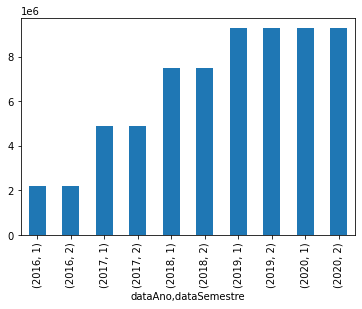

In [14]:
pagamentoData.groupby(['dataAno','dataSemestre'])['salario'].sum().plot(kind = 'bar')

**Exemplo de consulta drill-down:** Qual o valor gasto em salários por ano, considerando cada trimestre?

In [15]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum()

dataAno  dataTrimestre
2016     1                1110654.27
         2                1110654.27
         3                1110654.27
         4                1110654.27
2017     1                2443819.95
         2                2443819.95
         3                2443819.95
         4                2443819.95
2018     1                3733881.60
         2                3733881.60
         3                3733881.60
         4                3733881.60
2019     1                4641916.59
         2                4641916.59
         3                4641916.59
         4                4641916.59
2020     1                4641916.59
         2                4641916.59
         3                4641916.59
         4                4641916.59
Name: salario, dtype: float64

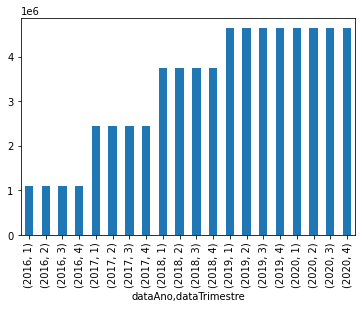

In [16]:
pagamentoData.groupby(['dataAno', 'dataTrimestre'])['salario'].sum().plot(kind = 'bar')

**Exemplo de consulta roll-up:** Qual o valor gasto em salários por ano?

In [17]:
pagamentoData.groupby(['dataAno'])['salario'].sum()

dataAno
2016     4442617.08
2017     9775279.80
2018    14935526.40
2019    18567666.36
2020    18567666.36
Name: salario, dtype: float64

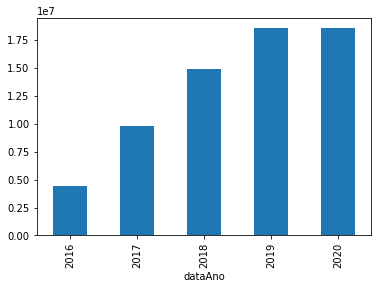

In [18]:
pagamentoData.groupby(['dataAno'])['salario'].sum().plot(kind = 'bar')

## 3.3 Operação Pivot

**Definição:** Reorienta a visão multidimensional dos dados, oferecendo diferentes perspectivas dos mesmos dados.

Para ilustrar a operação pivot, considere a consulta base definida a seguir. 

**Consulta base:**  Qual o valor gasto em salários por ano, considerando cada nível de cargo?

In [19]:
pagamentoData = pagamento.merge(data, on = 'dataPK')
pagamentoDataCargo = pagamentoData.merge(cargo, on = 'cargoPK')
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum()

dataAno  cargoNivel
2016     JUNIOR          489456.84
         PLENO          1454152.44
         SENIOR         2499007.80
2017     JUNIOR         1030642.80
         PLENO          3791593.92
         SENIOR         4953043.08
2018     JUNIOR         1393282.20
         PLENO          5357227.44
         SENIOR         8185016.76
2019     JUNIOR         1755714.36
         PLENO          6132228.24
         SENIOR        10679723.76
2020     JUNIOR         1755714.36
         PLENO          6132228.24
         SENIOR        10679723.76
Name: salario, dtype: float64

In [20]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1)

cargoNivel,JUNIOR,PLENO,SENIOR
dataAno,,,
2016,489456.84,1454152.44,2499007.80
2017,1030642.80,3791593.92,4953043.08
2018,1393282.20,5357227.44,8185016.76
2019,1755714.36,6132228.24,10679723.76
2020,1755714.36,6132228.24,10679723.76


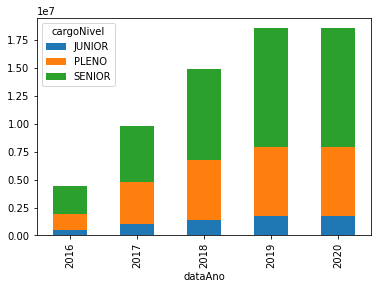

In [21]:
pagamentoDataCargo.groupby(['dataAno', 'cargoNivel'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Ano', 'Nível do Cargo'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

**Exemplo de consulta pivot:** Qual o valor gasto em salários por nível de cargo, considerando cada ano?

In [22]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum()
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum()

cargoNivel  dataAno
JUNIOR      2016         489456.84
            2017        1030642.80
            2018        1393282.20
            2019        1755714.36
            2020        1755714.36
PLENO       2016        1454152.44
            2017        3791593.92
            2018        5357227.44
            2019        6132228.24
            2020        6132228.24
SENIOR      2016        2499007.80
            2017        4953043.08
            2018        8185016.76
            2019       10679723.76
            2020       10679723.76
Name: salario, dtype: float64

In [23]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1)

dataAno,2016,2017,2018,2019,2020
cargoNivel,,,,,
JUNIOR,489456.84,1030642.80,1393282.20,1755714.36,1755714.36
PLENO,1454152.44,3791593.92,5357227.44,6132228.24,6132228.24
SENIOR,2499007.80,4953043.08,8185016.76,10679723.76,10679723.76


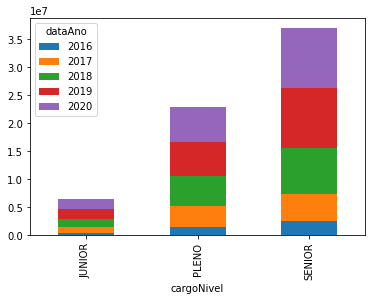

In [24]:
pagamentoDataCargo.groupby(['cargoNivel', 'dataAno'])['salario'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)
#pagamentoDataCargo.rename(mapper={"dataAno": "Ano", "cargoNivel": "Nível do Cargo", "salario": "Total de Gastos em Salários"}, axis=1).groupby(['Nível do Cargo', 'Ano'])['Total de Gastos em Salários'].sum().unstack(level = 1).plot(kind = 'bar', stacked = True)

## 3.4 Operação Drill-Across

**Definição:** Compara medidas numéricas de tabelas de fatos diferentes, utilizando pelo menos uma dimensão em comum. 

**Exemplo de consulta:** Qual o total gasto com salários e qual o total de receitas recebidas, considerando cada ano?

In [25]:
#total gasto em salários considerando cada ano
#dados obtidos utilizando a tabela de fatos pagamento
pagamentoData = pagamento.merge(data, on = 'dataPK') 
pagamentoAno = pagamentoData.groupby(['dataAno'])['salario'].sum().to_frame()

In [26]:
#total de receitas recebidas, considerando cada ano
#dados obtidos utilizando a tabela de fatos negociacao
negociacaoData = negociacao.merge(data, on = 'dataPK')
negociacaoAno = negociacaoData.groupby(['dataAno'])['receita'].sum().to_frame()

In [27]:
#relacionado as medidas numéricas presentes nas duas tabelas de fatos
pagamentoAno.merge(negociacaoAno, on = 'dataAno')

,salario,receita
dataAno,,
2016,4442617.08,4614246.95
2017,9775279.80,7200423.35
2018,14935526.40,11593539.65
2019,18567666.36,35353318.30
2020,18567666.36,30222175.95


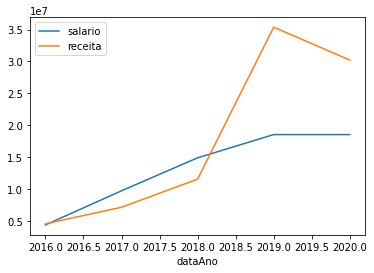

In [28]:
pagamentoAno.merge(negociacaoAno, on = 'dataAno').plot()

# 3 Execução de Consultas com Foco na Tomada de Decisão

As consultas OLAP requisitadas por usuários de sistemas de suporte à decisão usualmente requerem que várias operações OLAP sejam realizadas simultaneamente. A seguir são ilustrados exemplos de consultas OLAP que podem ser requisitadas para a tomada de decisão estratégica.

## 3.1 Consulta 1

**Consulta:** Qual é a média dos salários recebidos por nível do cargo e por sexo no ano passado (ou seja, no ano de 2019)?

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `cargo`, `funcionario` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.cargoPK = cargo.cargoPK`
- `pagamento.funcPK = funcionario.funcPK`
- `pagamento.dataPK = data.dataPK` 

In [29]:
dataFiltrada = data.query('dataAno == 2019')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataFunc = pagamentoData.merge(funcionario, on = 'funcPK')
pagamentoDataFuncCargo = pagamentoDataFunc.merge(cargo, on = 'cargoPK')
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean()

cargoNivel  funcSexo
JUNIOR      F            2440.233125
            M            2437.859091
PLENO       F            7641.937619
            M            6259.613036
SENIOR      F           12994.190000
            M           14480.502708
Name: salario, dtype: float64

In [30]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1)

funcSexo,F,M
cargoNivel,,
JUNIOR,2440.233125,2437.859091
PLENO,7641.937619,6259.613036
SENIOR,12994.190000,14480.502708


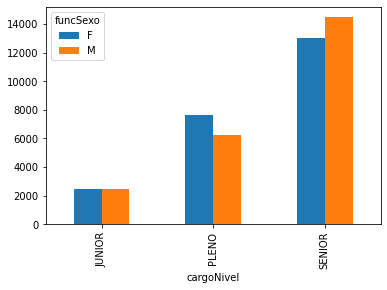

In [31]:
pagamentoDataFuncCargo.groupby(['cargoNivel','funcSexo'])['salario'].mean().unstack(level = 1).plot(kind = 'bar')

## 3.2 Consulta 2

**Consulta:** Qual o total de gastos em salários considerando os estados nos quais as equipes estão localizadas no último trimestre deste ano (ou seja, o trimestre 3 do ano de 2020)? 

Para se realizar esta consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como da tabela de fatos `pagamento`. A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipePK`


In [32]:
dataFiltrada = data.query('dataTrimestre == 3 and dataAno == 2020')
pagamentoData = pagamento.merge(dataFiltrada, on = 'dataPK')
pagamentoDataEquipe = pagamentoData.merge(equipe, on = 'equipePK')
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values()

filialEstadoNome
PERNAMBUCO             438121.26
MATO GROSSO DO SUL    1013857.74
RIO DE JANEIRO        1258479.57
SAO PAULO             1931458.02
Name: salario, dtype: float64

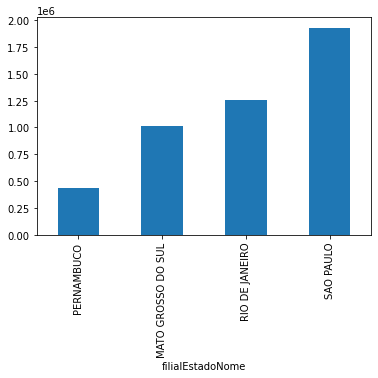

In [33]:
pagamentoDataEquipe.groupby(['filialEstadoNome'])['salario'].sum().sort_values().plot(kind = 'bar')

## 3.3 Consulta 3

**Consulta:** Qual o custo/benefício das equipes quando analisado o último semestre deste ano (ou seja, semestre 1 do ano de 2020)?

A idea da consulta é relacionar os gastos em salários e os ganhos em receitas considerando cada equipe e o período especificado. Portanto, para se realizar essa consulta, é necessário obter dados das tabelas de dimensão `equipe` e `data`, bem como das tabelas de fatos `pagamento` e `negociacao`. 

 A junção estrela deve ocorrer considerando as seguintes integridades referenciais:
- `pagamento.dataPK = data.dataPK`
- `pagamento.equipePK = equipe.equipe.PK`
- `negociacao.dataPK = data.dataPK`
- `negociacao.equipePK = equipe.equipe.PK`


In [34]:
#investigando os gastos em salarios de cada equipe no último semestre deste ano 
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
pagamentoData = dataFiltrada.merge(pagamento, on = 'dataPK' )
pagamentoDataEquipe = pagamentoData.groupby(['equipePK'])['salario'].sum().to_frame() 
pagamentoDataEquipe.head(10)

,salario
equipePK,
1,1160327.40
2,1060981.14
3,1177330.32
4,579893.94
5,909107.10
6,585430.86
7,876084.06
8,1118608.38
9,939827.46


In [35]:
#investigando os ganhos em receitas de cada equipe no último semestre deste ano
dataFiltrada = data.query('dataSemestre == 1 and dataAno == 2020')
negociacaoData = dataFiltrada.merge(negociacao, on = 'dataPK' )
negociacaoDataEquipe = negociacaoData.groupby(['equipePK'])['receita'].sum().to_frame() 
negociacaoDataEquipe.head(10)

,receita
equipePK,
1,1259907.25
2,1338994.40
3,340461.30
4,340130.65
5,614747.70
6,736591.35
7,722758.45
8,538659.30
9,4994717.70


In [36]:
#juntando os dados obtidos
pagamentoNegociacao = pagamentoDataEquipe.merge(negociacaoDataEquipe, on = 'equipePK' )
#exibindo o custo/benefício para cada equipe relacionada a cada filial
pagamentoNegociacao['lucro'] = pagamentoNegociacao['receita'] - pagamentoNegociacao['salario']
pagamentoNegociacao.head(10)

,salario,receita,lucro
equipePK,,,
1,1160327.40,1259907.25,99579.85
2,1060981.14,1338994.40,278013.26
3,1177330.32,340461.30,-836869.02
4,579893.94,340130.65,-239763.29
5,909107.10,614747.70,-294359.40
6,585430.86,736591.35,151160.49
7,876084.06,722758.45,-153325.61
8,1118608.38,538659.30,-579949.08
9,939827.46,4994717.70,4054890.24


In [37]:
#exibindo dados mais semânticos, relacionados às equipes
pagamentoNegociacaoEquipeCidade = pagamentoNegociacao.merge(equipe, on = 'equipePK' )
pagamentoNegociacaoEquipeCidade[['equipePK', 'equipeNome', 'filialNome', 'lucro']].sort_values(by='lucro', ascending=False).head(10)

,equipePK,equipeNome,filialNome,lucro
8,9,BI & ANALYTICS,SAO PAULO - AV. PAULISTA,4054890.24
9,10,BI & ANALYTICS,RECIFE - CENTRO,3788503.18
1,2,APP - DESKTOP,RIO DE JANEIRO - BARRA DA TIJUCA,278013.26
5,6,APP - MOBILE,SAO PAULO - AV. PAULISTA,151160.49
0,1,APP - DESKTOP,SAO PAULO - AV. PAULISTA,99579.85
6,7,APP - MOBILE,RIO DE JANEIRO - BARRA DA TIJUCA,-153325.61
3,4,WEB,RIO DE JANEIRO - BARRA DA TIJUCA,-239763.29
4,5,WEB,CAMPO GRANDE - CENTRO,-294359.40
7,8,APP - MOBILE,CAMPO GRANDE - CENTRO,-579949.08
2,3,WEB,SAO PAULO - AV. PAULISTA,-836869.02


In [38]:
#investigando o custo/benefício total
pagamentoNegociacaoEquipeCidade['lucro'].sum()

6267880.620000001

Como pode ser observado, existem equipes lucrativas e equipes que estão tendo prejuízo. Usuários de sistemas de suporte a decisão devem estabelecer estratégias para definir o que será feito com as equipes que geram prejuízo. Será que elas devem ser dissolvidas? Será que podem ser criadas políticas para que essas equipes sejam mais eficientes? Observa-se que o total de lucro obtido pela BI Solutions é positivo. Portanto, existe uma margem financeira para acomodar possíveis estratégias.